# jupyter notebook for plotting magnetic field strengths

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
name2filepath = {
    "PhageBox Electromagnet \n OFF w/o Chip" : "PhageBox_off_woChip",
    "PhageBox Electromagnet \n OFF with Chip" : "PhageBox_off_wChip",
    "Laberatory Stir Bar Magnet" : "PhageBox_mag",
    "PhageBox Electromagnet \n ON with Chip" : "PhageBox_on_wChip",
    "PhageBox Electromagnet \n ON w/o Chip" : "PhageBox_on_woChip",
}

In [172]:
def dict2array(name2filepath: dict):
    """
    """
    name2array = {}
    for filename, path in name2filepath.items():
        name2array[filename] = []
        with open(path, "r") as opened_file:
            for ind, line in enumerate(opened_file.readlines()):
                if ind > 3:
                    magnetic_strengths = line.strip("\n").split(",")
                    z_strength = abs(float(magnetic_strengths[3]))
                    name2array[filename].append(z_strength)
                if ind > 50:
                    break
    return name2array

def dict2stdavg(dict2array):
    """
    """
    name2stdavg = {}
    for filename, val_arr in dict2array.items():
        val_arr2 = np.array(val_arr)
        avg = round(np.average(val_arr2),2)
        std = round(np.std(val_arr2),2)
        name2stdavg[filename] = (avg, std)
    return name2stdavg

In [173]:
# parse files.
dict2array2 = dict2array(name2filepath)
dict2stdavg2 = dict2stdavg(dict2array2)

## plotting

Text(0, 0.5, 'Magnetic Strength (uTesla)')

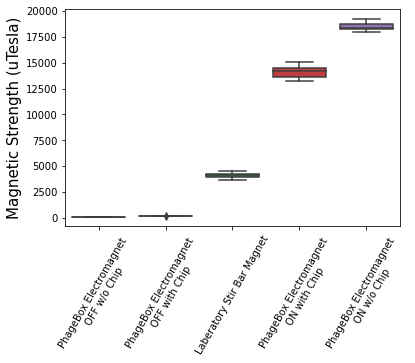

In [174]:
# create arrays
values = np.array([array for array in dict2array2.values()])
names = np.array([name for name in dict2array2.keys()])

# create DF
df = pd.DataFrame(values.T, columns=names)

# plot
sns.boxplot(data=df)
plt.xticks(rotation=60, size=10)
plt.ylabel('Magnetic Strength (uTesla)', size=15)